# <div align="center"><span style="font-size:300%;">**Analyse exploratoire et modélisation du dataset Auto-MPG**</span></div>

<div align="center">
    <h2> KADRI AISSAM</h2>
</div>
<div align="center">
    <h2> 22/03/2024</h2>
</div>



# **1. Introduction**

Les données Auto-Mpg, une ressource traditionnelle dans le domaine de l'apprentissage automatique et de la statistique, offrent une information sur la consommation de carburant en miles par gallon (mpg) de différents véhicules, ainsi que diverses autres caractéristiques essentielles telles que le nombre de cylindres, la cylindrée, la puissance en chevaux, le poids et bien d'autres encore. Les données utilisées fréquemment pour des analyses et des modèles prédictifs proviennent du référentiel Machine Learning UCI. Ce projet vise à créer un modèle précis pour prédire les miles par gallon en utilisant des méthodes de régression avancées comme les arbres de régression et les forêts aléatoires.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

# 2. Analyse des données

Au début de notre analyse, nous commencerons par télécharger les données , à savoir le fichier auto-mpg.csv. Par la suite, nous procéderons à une étude approfondie de ces données, en analysant leur organisation et leurs caractéristiques clés.

## 2.1 Importation des données

Pour l'importations ldes données à partir du fichier auto-mpg.csv, Tout d'abord, j'ai spécifié les noms des colonnes à l'aide des informations fournies dans le fichier cmc.names.
voila la signification de chaque variable:

- **MPG** : Kilométrage par gallon.
- **Cylinders** : Nombre de cylindres dans le moteur de la voiture.
- **Displacement** : Déplacement du moteur, une mesure de la taille totale des cylindres dans le moteur.
- **Horsepower** : Puissance du moteur, une mesure de la capacité de production de puissance du moteur.
- **Weight** : Poids du véhicule, une mesure de la masse totale du véhicule.
- **Acceleration** : Accélération du véhicule, une mesure de la vitesse à laquelle le véhicule peut passer d'un arrêt à une vitesse donnée.
- **Model Year** : Année du modèle de la voiture, représentant l'année de fabrication du véhicule.
- **Origin** : Origine du véhicule, indiquant le pays d'origine de la voiture.
- **Car Name** : Nom du véhicule, une étiquette unique pour chaque instance de voiture dans le jeu de données.



In [ ]:
nom_var_data= ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin','Car Name']
df=pd.read_csv('C:/Users/Etudiant/Desktop/Nouveau dossier/cluseriing/projet/auto-mpg.csv', sep=',',names=nom_var_data)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 2.2 les informations de l’ensemble de données.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


Les résultats affichés montrent qu'il y a 6 valeurs manquantes dans la colonne Horsepower. Concernant les différents types de variables, toutes les colonnes sont de nature numérique sauf la variable Car Name. Toutefois, en analysant attentivement les données concernant les attributs, il est évident que certaines variables sont en réalité catégorielles ou discrètes plutôt que continues. Ces variables sont : Cylinders, Origin, Cylinders, Model Year. Ainsi, afin de refléter de manière adéquate la nature de ces variables dans notre analyse, il serait préférable de les convertir en données catégorielles.

In [ ]:
df["Origin"] = df["Origin"].astype("category")
df["Model Year"]=df["Model Year"].astype("category")
df["Cylinders"]=df["Cylinders"].astype("category")

## 2.3 Gestion des valeurs manquantes

 Comme  **Horsepower** est une  variable continue qui contient toutes les valeurs  manquantes. mon approche consiste a remplacé les valeurs manquantes de cette variable par la moyenne.
 j'ai d'abord calculé la moyenne de **Horsepower (104.46938775510205)**. Ensuite  j'ai  remplace ces valeurs manquantes par cette moyenne, en utilisant le code ci-desous  

In [ ]:
moyenne_Horsepower = df["Horsepower"].mean()
print("moyenne de  Horsepower:", moyenne_Horsepower)

moyenne de  Horsepower: 104.46938775510205


In [ ]:
df["Horsepower"].replace(np.nan, moyenne_Horsepower, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MPG           398 non-null    float64 
 1   Cylinders     398 non-null    category
 2   Displacement  398 non-null    float64 
 3   Horsepower    398 non-null    float64 
 4   Weight        398 non-null    float64 
 5   Acceleration  398 non-null    float64 
 6   Model Year    398 non-null    category
 7   Origin        398 non-null    category
 8   Car Name      398 non-null    object  
dtypes: category(3), float64(5), object(1)
memory usage: 20.9+ KB


## 2.4 suppression des variables inutiles

In [ ]:
df.describe(include = "O")

,Car Name
count,398
unique,305
top,ford pinto
freq,6


Dans le cadre de notre analyse, j'ai pris la décision de supprimer la variable **Car Name** de notre jeu de données. Cette décision découle de plusieurs observations significatives. Bien que la variable contienne un nombre considérable d'entrées, soit 398 au total, elle présente une diversité marquée avec 305 valeurs uniques. Cependant, un élément clé réside dans le constat que "ford pinto" émerge comme l'entrée la plus fréquente, apparaissant six fois. Cette concentration notable autour de quelques catégories principales suggère une faible valeur ajoutée de la variable pour notre analyse, pouvant même introduire du bruit dans nos modèles et compliquer l'interprétation des résultats. Ainsi, en supprimant cette variable, nous simplifions notre ensemble de données tout en nous concentrant sur les aspects les plus significatifs de notre analyse.

In [ ]:
data=df.drop(columns="Car Name")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MPG           398 non-null    float64 
 1   Cylinders     398 non-null    category
 2   Displacement  398 non-null    float64 
 3   Horsepower    398 non-null    float64 
 4   Weight        398 non-null    float64 
 5   Acceleration  398 non-null    float64 
 6   Model Year    398 non-null    category
 7   Origin        398 non-null    category
dtypes: category(3), float64(5)
memory usage: 17.8 KB


## 2.5 Analyse des variables numériques

### 2.5.1 Carte de chaleur et nuage des points:
  
 carte de chaleur (heatmap): représentation de la corrélation entre les différentes variables numériques dans ensemble des données

C:\Users\Etudiant\AppData\Local\Temp\ipykernel_8660\3585394943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


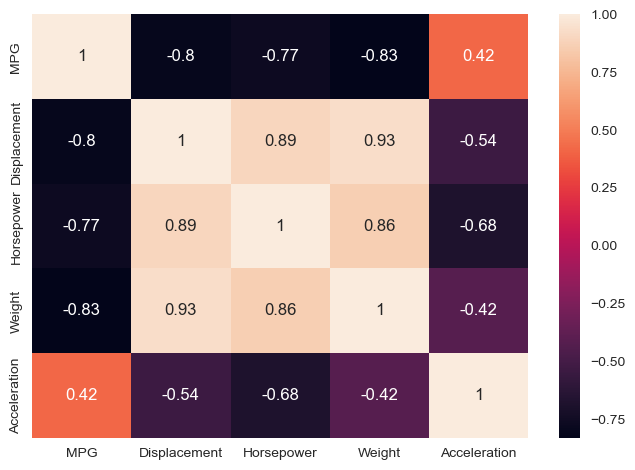

In [ ]:
sns.heatmap(data.corr(), annot = True)
plt.show()

D'après la carte de chaleur, nous avons observé une forte corrélation négative  entre **MGP** et des variables clés telles que **Displacement**, **Horsepower**, et **Weight**. Les résultats indiquent que les voitures avec des moteurs plus gros et plus puissants, ainsi qu'un poids plus élevé, tendent à consommer plus de carburant. En revanche, une légère corrélation positive a été remarquée entre **MGP** et **Acceleration**.
On peut voir cette corrélation

Afin de mieux comprendre la relation entre la variable **MGP** et les autres variables numériques, j'ai employé le graphique nuage des points suivant:



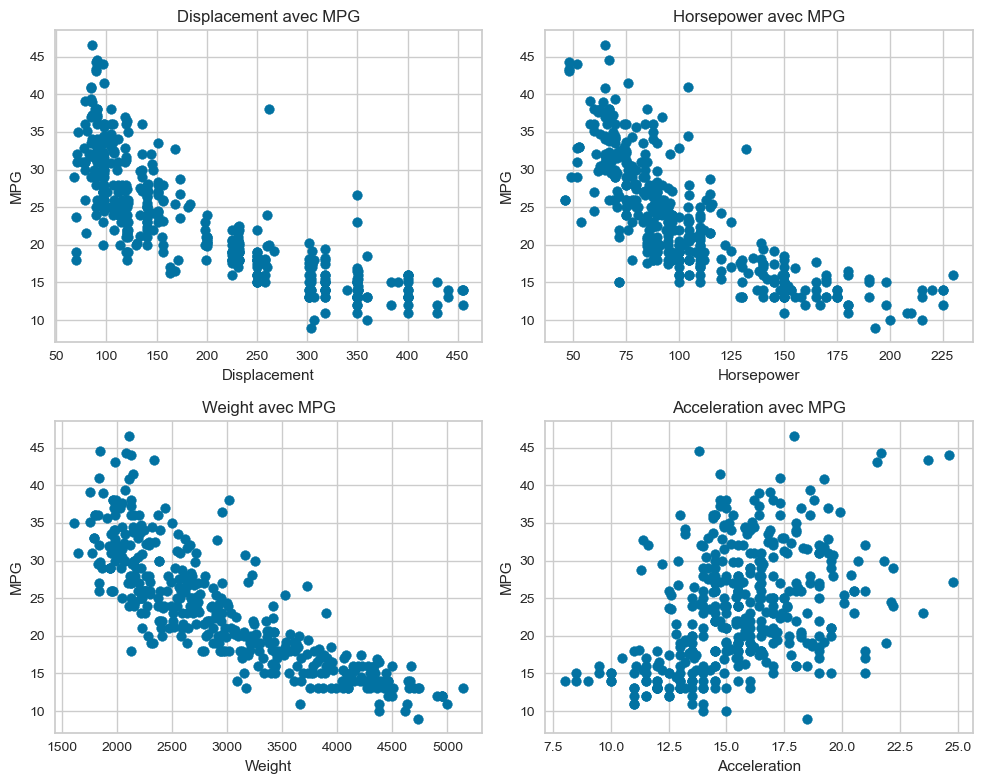

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
var_numerique = ['Displacement', 'Horsepower', 'Weight', 'Acceleration']
for i, ax in enumerate(axs.flat):
    col = var_numerique[i]
    ax.scatter(data[col], data['MPG'])
    ax.set_xlabel(col)
    ax.set_ylabel('MPG')
    ax.set_title(f'{col} avec MPG')

plt.tight_layout()
plt.show()

 **Remarques:**

_ D'après les graphiques que nous avons obtenus, il semble y avoir une corrélation négative forte entre le MPG et la puissance, Déplacement et le poids du véhicule.

_ lorsque la puissance du moteur augmente, le MPG diminue.

_ Le MPG diminue lorsque le poids du véhicule augmente. Ainsi, les voitures lourds ont tendance à consommer moins de carburant.

_ Quand le déplacement du moteur augmente, Le MPG diminue.
Cependant, il semble ne pas y avoir de corrélation significative entre le MPG et l'accélération, ce qui signifie que l'accélération n'a pas un impact notable sur la consommation de carburant dans notre ensemble de données.

## 2.6 les variable cathégorial

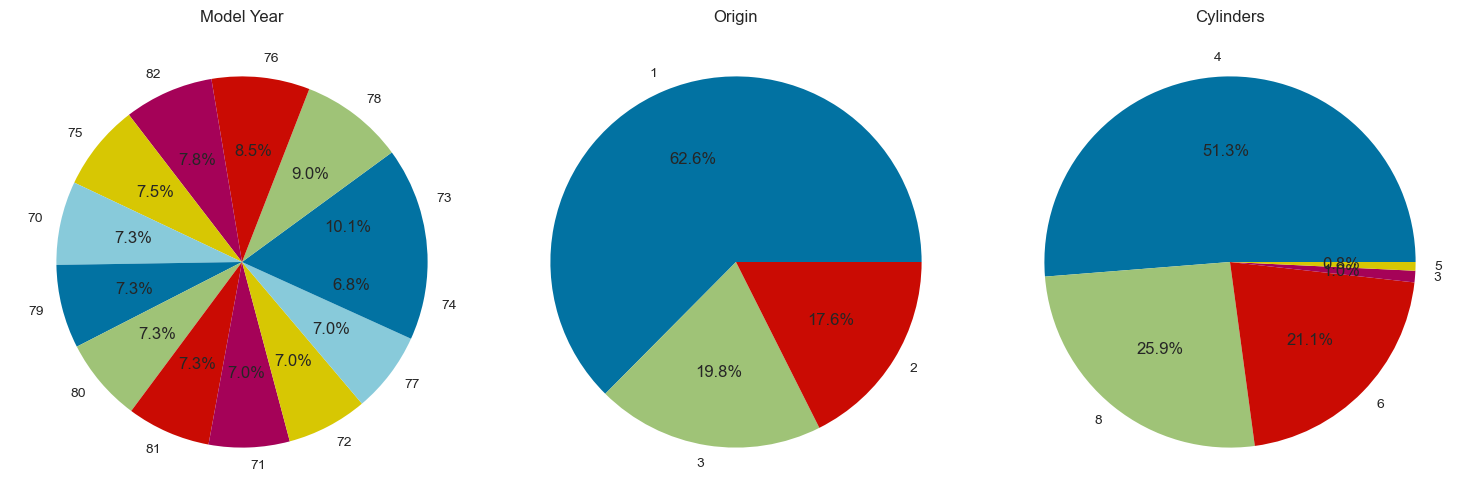

In [ ]:
columns = ['Model Year', 'Origin','Cylinders']
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

for i, column in enumerate(columns):
    data[column].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%')
    axes[i].set_ylabel('')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


La majorité des voitures ont une origine de type 1, représentant 62,6 % du total. L'origine 3 est légèrement plus élevée que l'origine 2, mais la différence est négligeable.

En ce qui concerne l'année du modèle, 1973 est l'année la plus fréquente avec une fréquence de 10,1 %. Les années 1978 et 1976 occupent respectivement la deuxième et la troisième place avec des fréquences de 9,0 % et 8,5 %. Les autres années sont assez proches les unes des autres, avec une fréquence d'environ 7,3 %.

En ce qui concerne le nombre de cylindres, la plupart des voitures ont 4 cylindres, représentant 51,3 % du total. Un nombre significatif de voitures ont également 6 et 8 cylindres, avec des pourcentages respectifs de 21,1 % et 25,9 %. Seules quelques voitures ont 3 ou 5 cylindres.

# 3. Régression

## 3.1 préparer les données pour prédire la variable MPG

La première étape pour prédire la variable **MPG** est de préparer les données de manière adéquate. Dans cette optique,nous avons extrait la variable de sortie  **MGP** du reste des caractéristiques.donc on obtient : X  et y

In [ ]:
X = data.drop("MPG", axis = 1)
y = data["MPG"]

In [ ]:
X.shape

(398, 7)

### 3.1.1 Sépartion des données d'entrainnement et les données de test:

Nous avons séparé nos données en deux ensembles: un ensemble d'entraînement, qui représente 80% des données, et un ensemble de test, qui représente 20% des données.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

## 3.2 un arbre de régression de type CART

In [ ]:
Rtr = DecisionTreeRegressor()
Rtr .fit(X_train,y_train)
y_pred = Rtr .predict(X_test)

In [ ]:
nom_var=['Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

### 3.2.1 visualisation de l'arbre

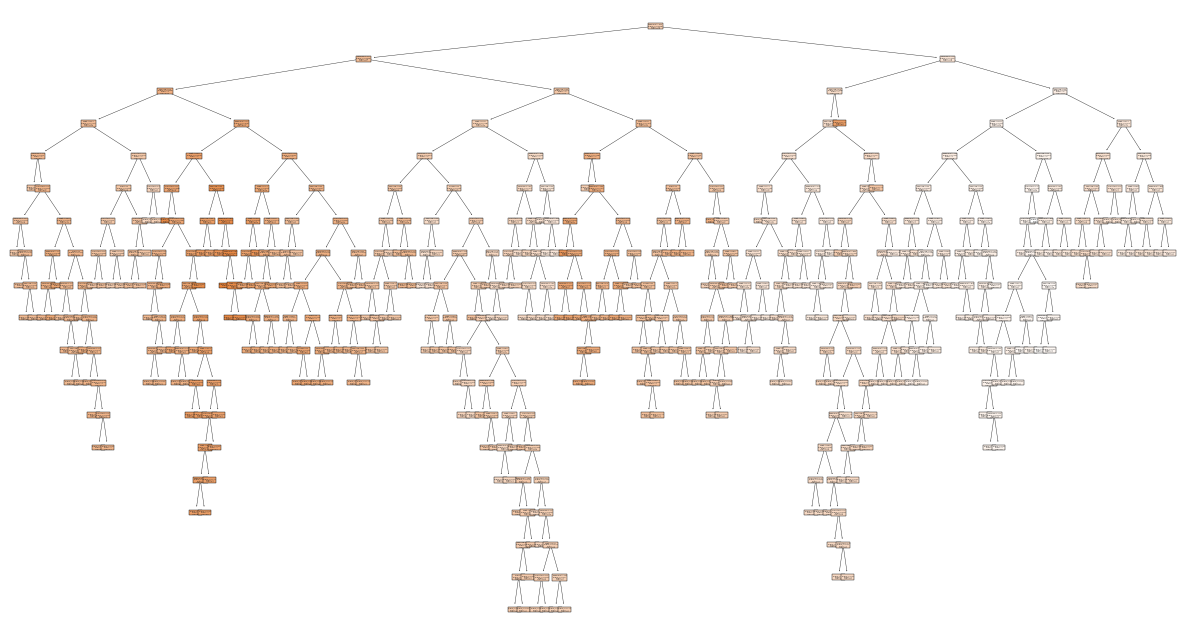

In [ ]:
fig = plt.figure(figsize=(15,8))
graph= plot_tree(Rtr , feature_names=nom_var, filled=True)

### 3.2.2 L'importance des variables

<BarContainer object of 7 artists>

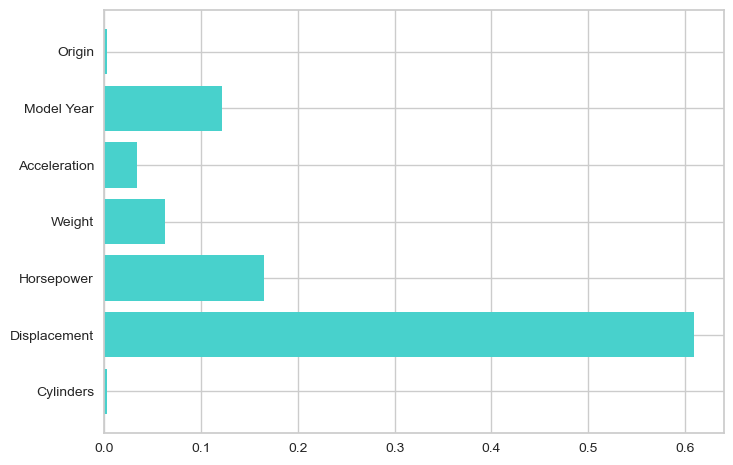

In [ ]:
plt.barh(nom_var, Rtr.feature_importances_,color='mediumturquoise')


À partir du graphe d'importance des caractéristiques, on peut déduire Les variables les plus significatives pour notre modèle d'arbre de régression. la variable la plus significative est **Displacement**, ce qui indique qu'elle a le plus grand impact sur nos anticipations. Par la suite, la deuxième variable la plus influente semble être **Horsepower**. D'un autre côté, **Cylinders** et **Origin** ont un impact inférieur sur nos prédictions.

### 3.2.3 les valeurs des mesures d'erreurs mean square error, absolute mean square error, R2

In [ ]:
Mse_tr = mean_squared_error(y_test,y_pred)
Mae_tr = mean_absolute_error(y_test,y_pred)
R2_tr = r2_score(y_test,y_pred)
print("Mean Squared Error  (l'arbre):", Mse_tr)
print("Mean Absolute Error  (l'arbre):", Mae_tr)
print("R^2 Score (l'arbre):", R2_tr)

Mean Squared Error  (l'arbre): 11.234375000000002
Mean Absolute Error  (l'arbre): 2.23125
R^2 Score (l'arbre): 0.7910522955128495


Arbre de régression présente une précision de 79%, . En outre, il affiche une moyenne d'erreur quadratique de 11,20 et une moyenne d'erreur absolue de 2.20.
En conclusion, les résultats indiquent que l'utilisationn de l'arbre  semble être une méthode efficace pour cette tâche de prédiction.


## 3.3 forêt aléatoire

In [ ]:
Rrf = RandomForestRegressor()
Rrf.fit(X_train,y_train)
y2_pred = Rrf.predict(X_test)


### 3.3.1 Visualisation de la Forêt Aléatoire (premier arbre) :

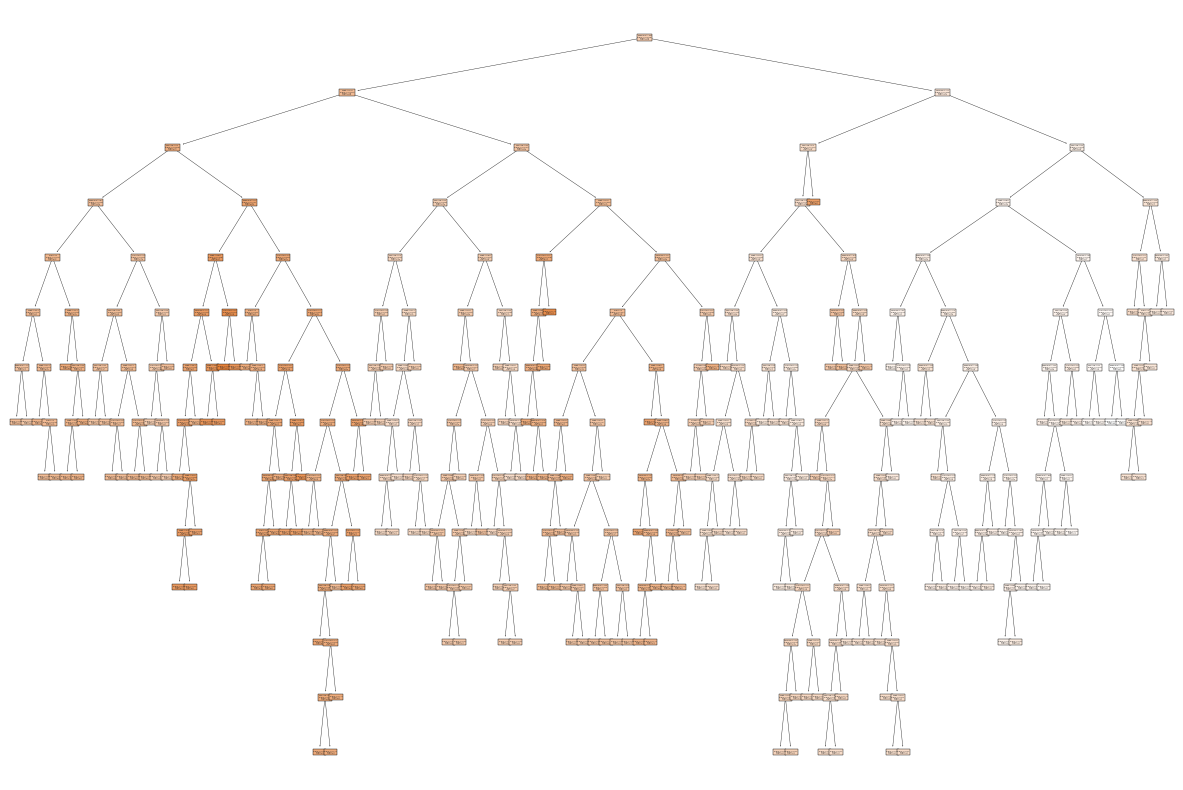

In [ ]:
# premier arbre
pr_arbre=Rrf.estimators_[0]
plt.figure(figsize=(15,10))
arbre_1=plot_tree(pr_arbre, feature_names= nom_var, filled=True)

### 3.3.2 L'importance des variables

<BarContainer object of 7 artists>

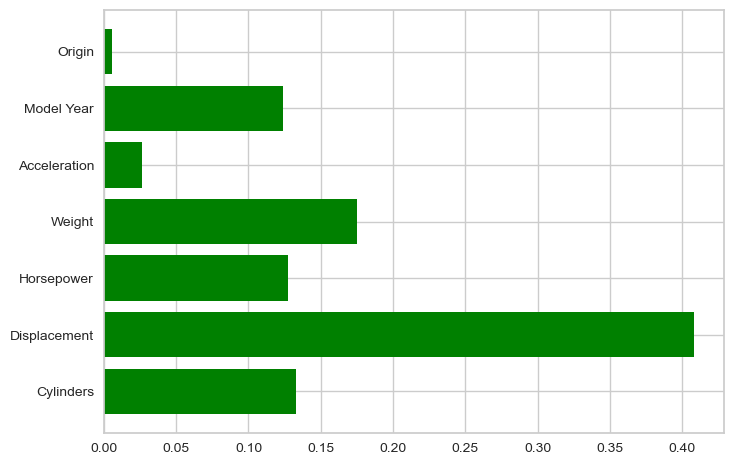

In [ ]:
importances = Rrf.feature_importances_
plt.barh(nom_var, Rrf.feature_importances_,color='green')

D'après le graphe d'importance des variables pour la forêt aléatoire de régression, **Displacement** est la variable la plus importante, suivie de **Weight** et **Horsepower**. Par contre, il semble que **Acceleration** et **Origin** aient une influence plutôt limitée sur nos prédictions.

### 3.3.3 les valeurs des mesures d'erreurs mean square error, absolute mean square error, R2

In [ ]:
mse_Rfr = mean_squared_error(y_test,y2_pred)
mae_Rfr = mean_absolute_error(y_test,y2_pred)
r2_Rfr = r2_score(y_test,y2_pred)
print("Mean Squared Error (Random forest):", mse_Rfr)
print("Mean Absolute Error (Random forest):", mae_Rfr)
print("R^2 Score (Random forest):", r2_Rfr)

Mean Squared Error (Random forest): 4.4629157999999975
Mean Absolute Error (Random forest): 1.5642249999999998
R^2 Score (Random forest): 0.9169944022939029


Les résultats de la forêt aléatoire de régression ont été excellents. Ce modèle présente une précision dans la prédiction des valeurs cibles grâce à une erreur quadratique moyenne de seulement 4,63 et une erreur absolue moyenne de 1.58. Le coefficient de détermination R2 élevé ( 0,91) démontre qu'il explique efficacement la variation des données. La diversité des arbres dans la forêt aléatoire est responsable de ces performances remarquables, ce qui permet de réduire le surajustement et d'améliorer la généralisation du modèle.

Bien que l'arbre de régression soit pertinent, la forêt aléatoire offre des performances bien supérieurs. La précision de l'arbre de régression est inférieure, tandis que celle de la forêt aléatoire est remarquable, ce qui en fait le choix idéal pour prédire **MPG**.

## Conclusion:

En résumé, à l'aide de notre prétraitement, nous avons réussi à obtenir deux modèles efficaces pour notre observation. Toutefois, une faiblesse majeure de notre approche réside dans le manque d'utilisation de tests statistiques tels que le test ANOVA afin de choisir les variables catégorielles pertinentes. Il est possible que cette omission ait un impact sur la fiabilité et la validité de nos résultats en ne prenant pas en considération l'influence importante de certaines variables sur nos modèles.
Afin d'améliorer notre recherche à l'avenir, il est fortement conseillé d'intégrer des méthodes de sélection de variables plus avancées, comme le Zonoid de Lorenz. Grâce à cette approche, il serait possible d'identifier de manière plus précise les variables les plus influentes dans nos modèles, tout en fournissant le nombre exact des variables pertinentes.

# 4. Clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Dans cette partie, je commence par préparer les données pour l'analyse de clustering. La variable "car name" servira d'étiquette et ne sera donc pas utilisée comme variable d'entrée dans le processus de clustering.

In [ ]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.drop('Car Name',axis=1,inplace=True)

## 4.1  Analyse en composantes principales


Avant d'appliquer l'Analyse en Composantes Principales (ACP) sur les données de consommation des voitures, il est important de normaliser les variables. Cette étape garantit que chaque variable contribue de
manière équitable à l'analyse, en mettant toutes les variables à la même échelle. Cela évite que des variables avec des unités ou des plages de valeurs différentes ne dominent l'analyse, assurant ainsi des résultats plus précis et significatifs.






In [ ]:
#standardiser les données
sdas=StandardScaler()
df_norm=sdas.fit_transform(df)

### 4.1.1 projeter les données dans un espace 2D

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(df_norm)

In [ ]:
reduced_data

array([[ 2.74187296e+00,  9.57047908e-01],
       [ 3.56822075e+00,  1.06462080e+00],
       [ 3.05992212e+00,  1.17331887e+00],
       [ 3.00525262e+00,  1.05419068e+00],
       [ 2.99434661e+00,  1.24630585e+00],
       [ 4.68363239e+00,  1.13673129e+00],
       [ 5.16671217e+00,  1.33106814e+00],
       [ 5.08613644e+00,  1.42085076e+00],
       [ 5.16098750e+00,  1.17216557e+00],
       [ 4.35401868e+00,  1.51387393e+00],
       [ 3.83522235e+00,  1.30425266e+00],
       [ 3.82127375e+00,  1.63256616e+00],
       [ 3.83516917e+00,  1.25416858e+00],
       [ 4.52451720e+00,  1.50635417e+00],
       [-1.16537092e+00,  2.43052931e+00],
       [ 6.10294526e-01,  7.29655003e-01],
       [ 8.05020862e-01,  7.85090196e-01],
       [ 3.97647249e-01,  6.91574942e-01],
       [-1.51835416e+00,  2.53972565e+00],
       [-2.28146707e+00,  9.38227451e-01],
       [-1.06291832e+00,  1.30492910e+00],
       [-8.20848458e-01,  1.84994589e+00],
       [-1.14401141e+00,  1.40926868e+00],
       [-5.

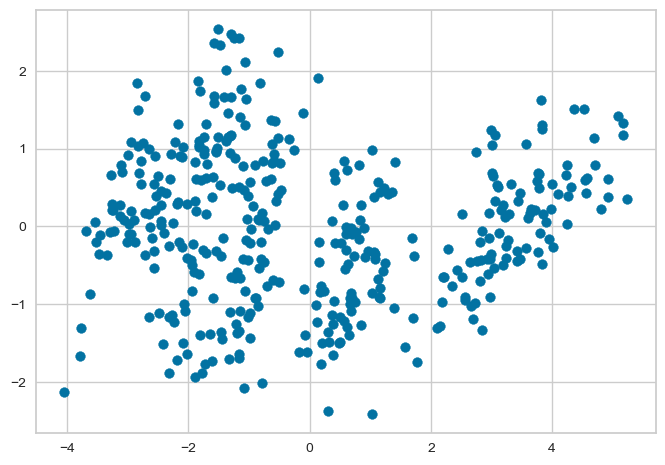

In [ ]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.show()

Après avoir observé la projection des composantes principales 2 de nos données, nous avons décidé de choisir l'algorithme k_means. Lorsqu'on analyse la projection, il est clair que les points sont organisés en groupes différents. k_means est idéal pour repérer ces structures en regroupant les points en clusters homogènes. Il est essentiel que notre analyse soit basée sur l'adaptabilité de l'algorithme k_means pour détecter des clusters distincts dans nos données projetées.

## 4.2 K_means

### 4.2.1 Le nombre optimal de clusters

pour le nombre optimal de clusters, nous faisons appel à la méthode du coude en utilisant l'algorithme K-means. Cela nous donne la possibilité de sélectionner le nombre de clusters  où l'inertie commence à diminuer de manière notable, ce qui nous indique le point optimal de segmentation de nos données.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

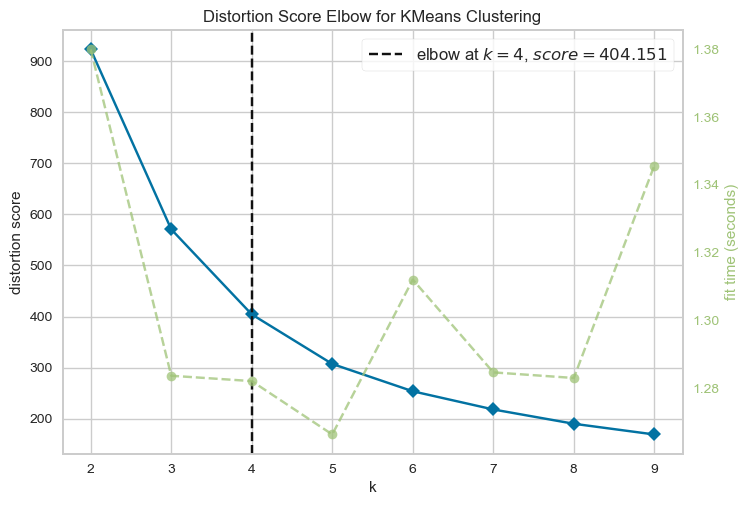

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
mod_km = KMeans()
visualizer = KElbowVisualizer(mod_km, k=(2,10))
visualizer.fit(reduced_data)
visualizer.show()

Selon la courbe du coude dans notre analyse de clustering K-means, Nous avons choisi 4 clusters comme nombre optimal.
donc on prend n_clusters=4.

In [ ]:
mod_kmeans=KMeans(n_clusters=4)
mod_kmeans.fit(reduced_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [ ]:
lables=mod_kmeans.labels_

## 4.3 visualisation dans l'espace 2D les clusters

Text(0.5, 1.0, ' K-means sur Les données Auto-Mpg \n')

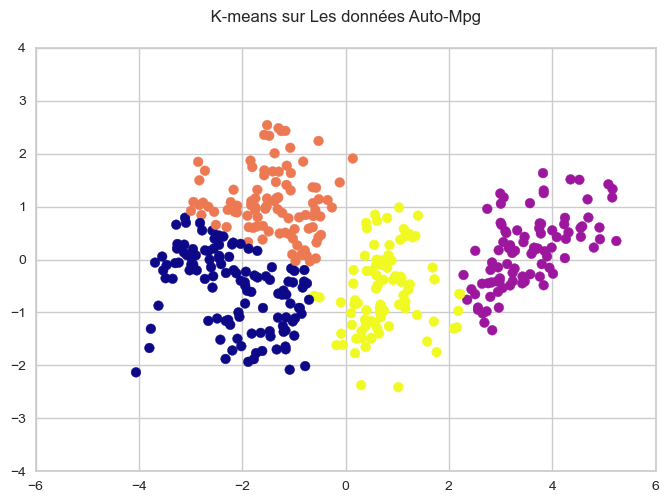

In [ ]:
plt.scatter(x=reduced_data[:, 0],y=reduced_data[:, 1],c=lables,cmap='plasma')
plt.xlim(-6,6)
plt.ylim(-4,4)
plt.title(" K-means sur Les données Auto-Mpg \n")

## 4.4 Score de silhouette:

In [ ]:
score = silhouette_score(reduced_data, labels, metric='euclidean')
print('Silhouetter Score: ', score)

Silhouetter Score:  0.43589615947285054


**Conclusion:**


Notre modèle K-means est considéré comme solide avec un score de silhouette de 0,436. Cela suggère qu'il y a une bonne distinction entre les clusters dans nos données. En d'autres mots, les points à l'intérieur de chaque cluster sont plus semblables les uns aux autres qu'avec les autres cluster. De cette manière, notre modèle a réussi à repérer des groupes distincts parmi nos données. Ceci augmente notre confiance en la pertinence des clusters repérés pour notre ensemble de données.
Toutefois, notre modèle k-means a aussi des points faibles, telles que la sensibilité aux paramètres , comme le nombre de clusters et l'initialisation des centroïdes, qui peuvent avoir un impact sur les résultats obtenus. Afin de perfectionner notre étude, il serait possible d'utilisation de techniques de sélection de modèle plus solides.